# Mini-Project -- Build a music recommendation system for myself

This project is to build a music recommendation system using the Spotify dataset.

The project contain 4 parts: Read Data, preparation for recomendation system, 4 recommendation system, summary.

To build the recommendation system based on my own music preference and behaivour, I selected 14 features to calculate, create my_songs dataset, which contains the songs I like.

Then reduce dimensions, clustering. Expand the result of clustering to the whole songs and then build recommendation system within each cluster using euclidean_distances and cosine similarity.

There are lots to optimize but it's a really fun and fruitful practice.

Dataset: Spotify dataset


Reference: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset

https://www.kaggle.com/code/yannansu/music-recommender-bonus-streamlit-app

https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset

https://www.kaggle.com/code/tj00001/building-music-recommendation-system-using-spotify

## 1 Read data


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personalisation-Mini_Project/data/data.csv')
artist_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personalisation-Mini_Project/data/data_by_artist.csv')
year_data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personalisation-Mini_Project/data/data_by_year.csv')

In [5]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [6]:
artist_data

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11



The features can be divided into **2 main parts.**



1.   **Info features**: 'name', 'artists', 'id', 'release_date', 'year', 'popularity'
2.  **Audio features**:'valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness','key', 'loudness', 'mode', 'tempo'
'duration_ms'


**Audio Features**


*   **Float -- [0,1]**


Acousticness: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.


Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live


Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.


Valence:A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

*   **Float-- not normalized**

Tempo:The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


Duration_ms: The duration of the track in milliseconds.


*   **Integer**


Key: the track is in.Integers map to pitches using standard


Mode: indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


Loudness:The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.




reference:https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features



In [7]:
song_info_features = ['name', 'artists', 'id', 'release_date', 'year', 'popularity']
song_features_normalized = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
song_features_not_normalized = ['duration_ms', 'key', 'loudness', 'mode', 'tempo']
data_mean_year = year_data.groupby('year').mean().reset_index()

Because music are often analysed in 'decade' in terms of time, so here I add a column of 'decade' in data

In [8]:
# add a column of dacade to the dataset
data['decade'] =  ((data['year'] - 1)//10)*10

## 2 Preparation for Recommendation System


Here're my perference when I listen to music:

I mainly consider 2 parts when I listen to music:



1.   The whole feeling of the song
*   This is hard to describe, because it's affected by so many features.
*   Generally speaking, I like songs with cheerful rhythm or melodious music that can make me feel peace and calm.





2.   The artist
*   I like to listen to some certain singers' song.  For example:  Jay Chou, Sasha Alex Salon, Troye Sivan, Lauv, Charlie Puth, Black Panther, Bigbang, EXO, Blackpink, Westlife


*   If the singer I like collaborate with other singers, I would have great interest in listening their collaborator. For example: Charlie Puth collaborate with Selena Gomez, I would have great interest in Selena Gomez's songs.


PS. I would listen to different types of music in different situations, like if I'm at work or study, I would choose some gentle music; when I'm walking or relaxing, I perfer some engertic music.
So, make some certain label for the songs I like may be a good idea.


The goal of my recommendation system:


1.   Recommend songs based **on the whole feeling and artists that I like**.
2.   Recommend **something new** to border my music horizon.


The solution:

1.   List the artists I like
2.   List the songs I like
3.   Create my_songs dataset
4.   Analyse the features of my_songs
5.   Build a classicfication of my_songs
6.   Understand the cluster
7.   Recommendation system within each cluster




### 2.1 List the artists I like


The artists I like most are: 'Jay Chou','Troye Sivan','Sasha Sloan','Lauv','Charlie Puth','Black Panther','Bigbang', 'EXO', 'Blackpink','Scarlet Pleasure','Chen Li','Måneskin','Coldplay','Westlife','Taylor swift','Avril Lavigne','Linkin Park'.

In [9]:
#remove puncutations in 'artists' column.
data['artists'] = data['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", "")

<ipython-input-9-c8ae75119b33>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['artists'] = data['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", "")


In [10]:
favorite_artists = ['Jay Chou','Troye Sivan','Sasha Sloan','Lauv','Charlie Puth','Bigbang', 'EXO', 'Blackpink','Coldplay','Westlife','Taylor swift','Avril Lavigne','Justin Bieber','Ed Sheeran','Scarlet Pleasure','G-DRAGON','Linkin Park','Måneskin']

# Create an empty DataFrame to store songs from favorite artists
favorite_artists_songs = pd.DataFrame()

#case-insensitive matching
for artist in favorite_artists:
    favorite_artists_songs = pd.concat([favorite_artists_songs, data[data['artists'].str.contains(artist, case=False,regex=False)]])

#reference:https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [11]:
favorite_artists_songs

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
35269,0.399,2003,0.27600,Jay Chou,0.547,269747,0.567,0,0F02KChKwbcQ3tk4q1YxLH,0.000548,7,0.104,-7.295,1,晴天,61,2003-07-31,0.0242,137.130,2000
53510,0.125,2001,0.61300,Jay Chou,0.505,334240,0.401,0,4FOydQ5IdqmdeBgG9vFbPg,0.000009,10,0.110,-7.869,1,安靜,60,2001-09-14,0.0282,143.864,2000
71184,0.544,2000,0.68100,Jay Chou,0.637,248160,0.557,0,4eLCzybaneILH1zBkwwQyZ,0.000000,9,0.102,-6.585,1,龍捲風,52,2000-11-06,0.0314,143.945,1990
71408,0.529,2001,0.00745,Jay Chou,0.859,270987,0.575,0,5Jtg0qcTKMHq3HjPVGRFAi,0.000010,0,0.330,-6.177,1,簡單愛,54,2001-09-14,0.0288,96.989,2000
71873,0.490,2004,0.38200,Jay Chou,0.483,295307,0.576,0,3kwqNLXvsjSrIXbVsRBj8q,0.000110,0,0.278,-6.911,0,七里香,56,2004-08-03,0.0280,142.132,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152159,0.296,2002,0.04360,Linkin Park,0.672,152533,0.974,0,53zw51qaLzcX7kOTlUqAqG,0.654000,10,0.828,-5.604,0,Kyur4 Th Ich (Chairman Hahn Reanimation),35,2002-07-29,0.1130,102.129,2000
152235,0.315,2003,0.07140,Linkin Park,0.499,202467,0.920,0,3wB4NxEEDV0UHDFaEVfFMZ,0.000000,3,0.116,-4.723,0,Easier to Run - Live LP Underground Tour 2003,38,2003-03-24,0.0589,105.018,2000
153530,0.366,2010,0.19400,Linkin Park,0.543,279453,0.923,1,0uIDQUwQmUltzyozMSezwQ,0.004460,9,0.430,-3.992,1,Blackout,43,2010-09-08,0.0768,134.997,2000
167108,0.235,2003,0.03360,Linkin Park,0.562,143800,0.936,0,3sbezh9MMCQrr4KY7zw13j,0.727000,10,0.537,-7.800,1,Session,46,2003-03-24,0.0617,98.039,2000


### 2.2 List the songs I like

Apart from my favourite singers' songs, I also like songs from some certain artists.Here I load my own playlist in spotify to do the analysis.

![quinny's playlist](https://drive.google.com/uc?export=view&id=1GxfuW6vXJobOqX8YNGYSNlGIbZD-yN0y)


The ID of my playlist is: 2Kng0pQlik4QHMfCT7odJV

Here I use the code from *3.1 Spotify Playlist Analysis* to load my playlist for further analysis.

In [12]:
!pip install spotipy

In [13]:
##These relate to an App on my developer account at Spotify and are used for authentication
##use the code from 3.1 Spotify Playlist Analysis
SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [14]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [15]:
#Put in the ID of a Spotify playlist of your choosing
playlist_id = '2Kng0pQlik4QHMfCT7odJV'

Here I creat a dataframe for my playlist, follow the form of favorite_artists_songs

In [126]:
playlist = sp.playlist(playlist_id)
tracks = playlist["tracks"]["items"]
results = []
for track in tracks:
    # get features
    track_info = track["track"]
    track_features = sp.audio_features(track_info["id"])[0]

    valence = track_features["valence"]
    year = track_info["album"]["release_date"][:4]
    acousticness = track_features["acousticness"]
    artists = ', '.join([artist["name"] for artist in track_info["artists"]])

    danceability = track_features["danceability"]
    duration_ms = track_info["duration_ms"]
    energy = track_features["energy"]
    explicit = track_info["explicit"]
    id = track_info["id"]
    instrumentalness = track_features["instrumentalness"]
    key = track_features["key"]
    liveness = track_features["liveness"]
    loudness = track_features["loudness"]
    mode = track_features["mode"]
    name = track_info["name"]
    popularity = track_info["popularity"]
    release_date = track_info["album"]["release_date"]
    speechiness = track_features["speechiness"]
    tempo = track_features["tempo"]
    decade = int(year) // 10 * 10

    results.append({
        'valence': valence, 'year': year, 'acousticness': acousticness, 'artists': artists,
        'danceability': danceability, 'duration_ms': duration_ms, 'energy': energy,
        'explicit': explicit, 'id': id, 'instrumentalness': instrumentalness, 'key': key,
        'liveness': liveness, 'loudness': loudness, 'mode': mode, 'name': name,
        'popularity': popularity, 'release_date': release_date, 'speechiness': speechiness,
        'tempo': tempo, 'decade': decade
    })

# turn the list to dataframe
playlist_songs = pd.DataFrame(results)

#reference：chat-gpt

In [127]:
playlist_songs

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.409,2008,0.226000,Mayday,0.462,265866,0.465,False,0IAgufC1FlOg1nZMmRZxRr,0.000008,2,0.1960,-6.485,1,突然好想你,64,2008-10-23,0.0262,140.112,2000
1,0.506,2015,0.750000,Hebe Tien,0.519,265521,0.412,False,1ZeVIrCWzEmsJexkrgvjFv,0.000000,0,0.1010,-8.584,1,小幸運,63,2015-07-10,0.0365,157.916,2010
2,0.326,2010,0.948000,JJ Lin,0.335,318499,0.326,False,632VyMrvhsHIsO4zq9khts,0.000000,0,0.0619,-7.223,1,她說,63,2010-12-08,0.0331,169.267,2010
3,0.215,2012,0.299000,Hu Xia,0.544,369866,0.528,False,3v8FOuA8jxAC5SOA2uN6Mg,0.000000,5,0.1070,-8.131,1,那些年,60,2012-02-24,0.0271,79.045,2010
4,0.197,2011,0.583000,A-Lin,0.399,285546,0.512,False,2DcmVSLAg0ZzfOQxDshZHY,0.000000,8,0.1040,-5.801,1,給我一個理由忘記,61,2011-07-08,0.0357,133.175,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.570,2014,0.103000,Taylor Swift,0.760,231826,0.703,False,1u8c2t2Cy7UBoG4ArRcF5g,0.000000,5,0.0913,-5.412,1,Blank Space,91,2014-01-01,0.0540,95.997,2010
96,0.864,2012,0.000802,Katy Perry,0.687,227333,0.792,False,3oL3XRtkP1WVbMxf7dtTdu,0.000000,1,0.2000,-4.023,0,The One That Got Away,75,2012-03-12,0.0353,133.962,2010
97,0.518,2018,0.151000,"Kris Kross Amsterdam, The Boy Next Door, Conor...",0.734,163636,0.765,True,3DGar7krWlmrXRFHBcQF6z,0.000000,7,0.2310,-5.562,1,Whenever (feat. Conor Maynard),65,2018-06-22,0.0621,109.989,2010
98,0.371,2016,0.211000,Oddity,0.766,201935,0.897,True,3WdBe1fmaPf0SOUZcQpFgr,0.000010,11,0.0918,-3.544,1,next dimension,10,2016-11-11,0.1360,85.923,2010


### 2.3 Create my_songs dataset

In [129]:
#combine the 2 dataframe together
my_songs  = pd.concat([playlist_songs, favorite_artists_songs], ignore_index=True)

In [130]:
#remove dupliacated songs, use 'id' as the subset
my_songs  = my_songs.drop_duplicates(subset='id')
my_songs

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.409,2008,0.2260,Mayday,0.462,265866,0.465,0,0IAgufC1FlOg1nZMmRZxRr,0.000008,2,0.1960,-6.485,1,突然好想你,64,2008-10-23,0.0262,140.112,2000
1,0.506,2015,0.7500,Hebe Tien,0.519,265521,0.412,0,1ZeVIrCWzEmsJexkrgvjFv,0.000000,0,0.1010,-8.584,1,小幸運,63,2015-07-10,0.0365,157.916,2010
2,0.326,2010,0.9480,JJ Lin,0.335,318499,0.326,0,632VyMrvhsHIsO4zq9khts,0.000000,0,0.0619,-7.223,1,她說,63,2010-12-08,0.0331,169.267,2010
3,0.215,2012,0.2990,Hu Xia,0.544,369866,0.528,0,3v8FOuA8jxAC5SOA2uN6Mg,0.000000,5,0.1070,-8.131,1,那些年,60,2012-02-24,0.0271,79.045,2010
4,0.197,2011,0.5830,A-Lin,0.399,285546,0.512,0,2DcmVSLAg0ZzfOQxDshZHY,0.000000,8,0.1040,-5.801,1,給我一個理由忘記,61,2011-07-08,0.0357,133.175,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.296,2002,0.0436,Linkin Park,0.672,152533,0.974,0,53zw51qaLzcX7kOTlUqAqG,0.654000,10,0.8280,-5.604,0,Kyur4 Th Ich (Chairman Hahn Reanimation),35,2002-07-29,0.1130,102.129,2000
940,0.315,2003,0.0714,Linkin Park,0.499,202467,0.920,0,3wB4NxEEDV0UHDFaEVfFMZ,0.000000,3,0.1160,-4.723,0,Easier to Run - Live LP Underground Tour 2003,38,2003-03-24,0.0589,105.018,2000
941,0.366,2010,0.1940,Linkin Park,0.543,279453,0.923,1,0uIDQUwQmUltzyozMSezwQ,0.004460,9,0.4300,-3.992,1,Blackout,43,2010-09-08,0.0768,134.997,2000
942,0.235,2003,0.0336,Linkin Park,0.562,143800,0.936,0,3sbezh9MMCQrr4KY7zw13j,0.727000,10,0.5370,-7.800,1,Session,46,2003-03-24,0.0617,98.039,2000


In [20]:
#remove 'id', 'release_date',non-numeric features
my_songs_features = my_songs.drop(['id', 'release_date','name','artists','year','explicit'], axis=1)
my_songs_features

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,decade
0,0.409,0.2260,0.462,265866,0.465,0.000008,2,0.1960,-6.485,1,64,0.0262,140.112,2000
1,0.506,0.7500,0.519,265521,0.412,0.000000,0,0.1010,-8.584,1,63,0.0365,157.916,2010
2,0.326,0.9480,0.335,318499,0.326,0.000000,0,0.0619,-7.223,1,63,0.0331,169.267,2010
3,0.215,0.2990,0.544,369866,0.528,0.000000,5,0.1070,-8.131,1,60,0.0271,79.045,2010
4,0.197,0.5830,0.399,285546,0.512,0.000000,8,0.1040,-5.801,1,61,0.0357,133.175,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.296,0.0436,0.672,152533,0.974,0.654000,10,0.8280,-5.604,0,35,0.1130,102.129,2000
940,0.315,0.0714,0.499,202467,0.920,0.000000,3,0.1160,-4.723,0,38,0.0589,105.018,2000
941,0.366,0.1940,0.543,279453,0.923,0.004460,9,0.4300,-3.992,1,43,0.0768,134.997,2000
942,0.235,0.0336,0.562,143800,0.936,0.727000,10,0.5370,-7.800,1,46,0.0617,98.039,2000


In [21]:
# do the same for all_songs
all_songs_features = data.drop(['id', 'release_date','name','artists','year','explicit'], axis=1)
all_songs_features

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,decade
0,0.0594,0.98200,0.279,831667,0.211,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954,1920
1,0.9630,0.73200,0.819,180533,0.341,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936,1920
2,0.0394,0.96100,0.328,500062,0.166,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339,1920
3,0.1650,0.96700,0.275,210000,0.309,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109,1920
4,0.2530,0.95700,0.418,166693,0.193,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,301714,0.808,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029,2010
170649,0.7340,0.20600,0.717,150654,0.753,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936,2010
170650,0.6370,0.10100,0.634,211280,0.858,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688,2010
170651,0.1950,0.00998,0.671,337147,0.623,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055,2010


### 2.4 Analyse the features

Figure out the distribution of the features of my_songs campared to that of all_songs.

<ipython-input-22-23693149857f>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


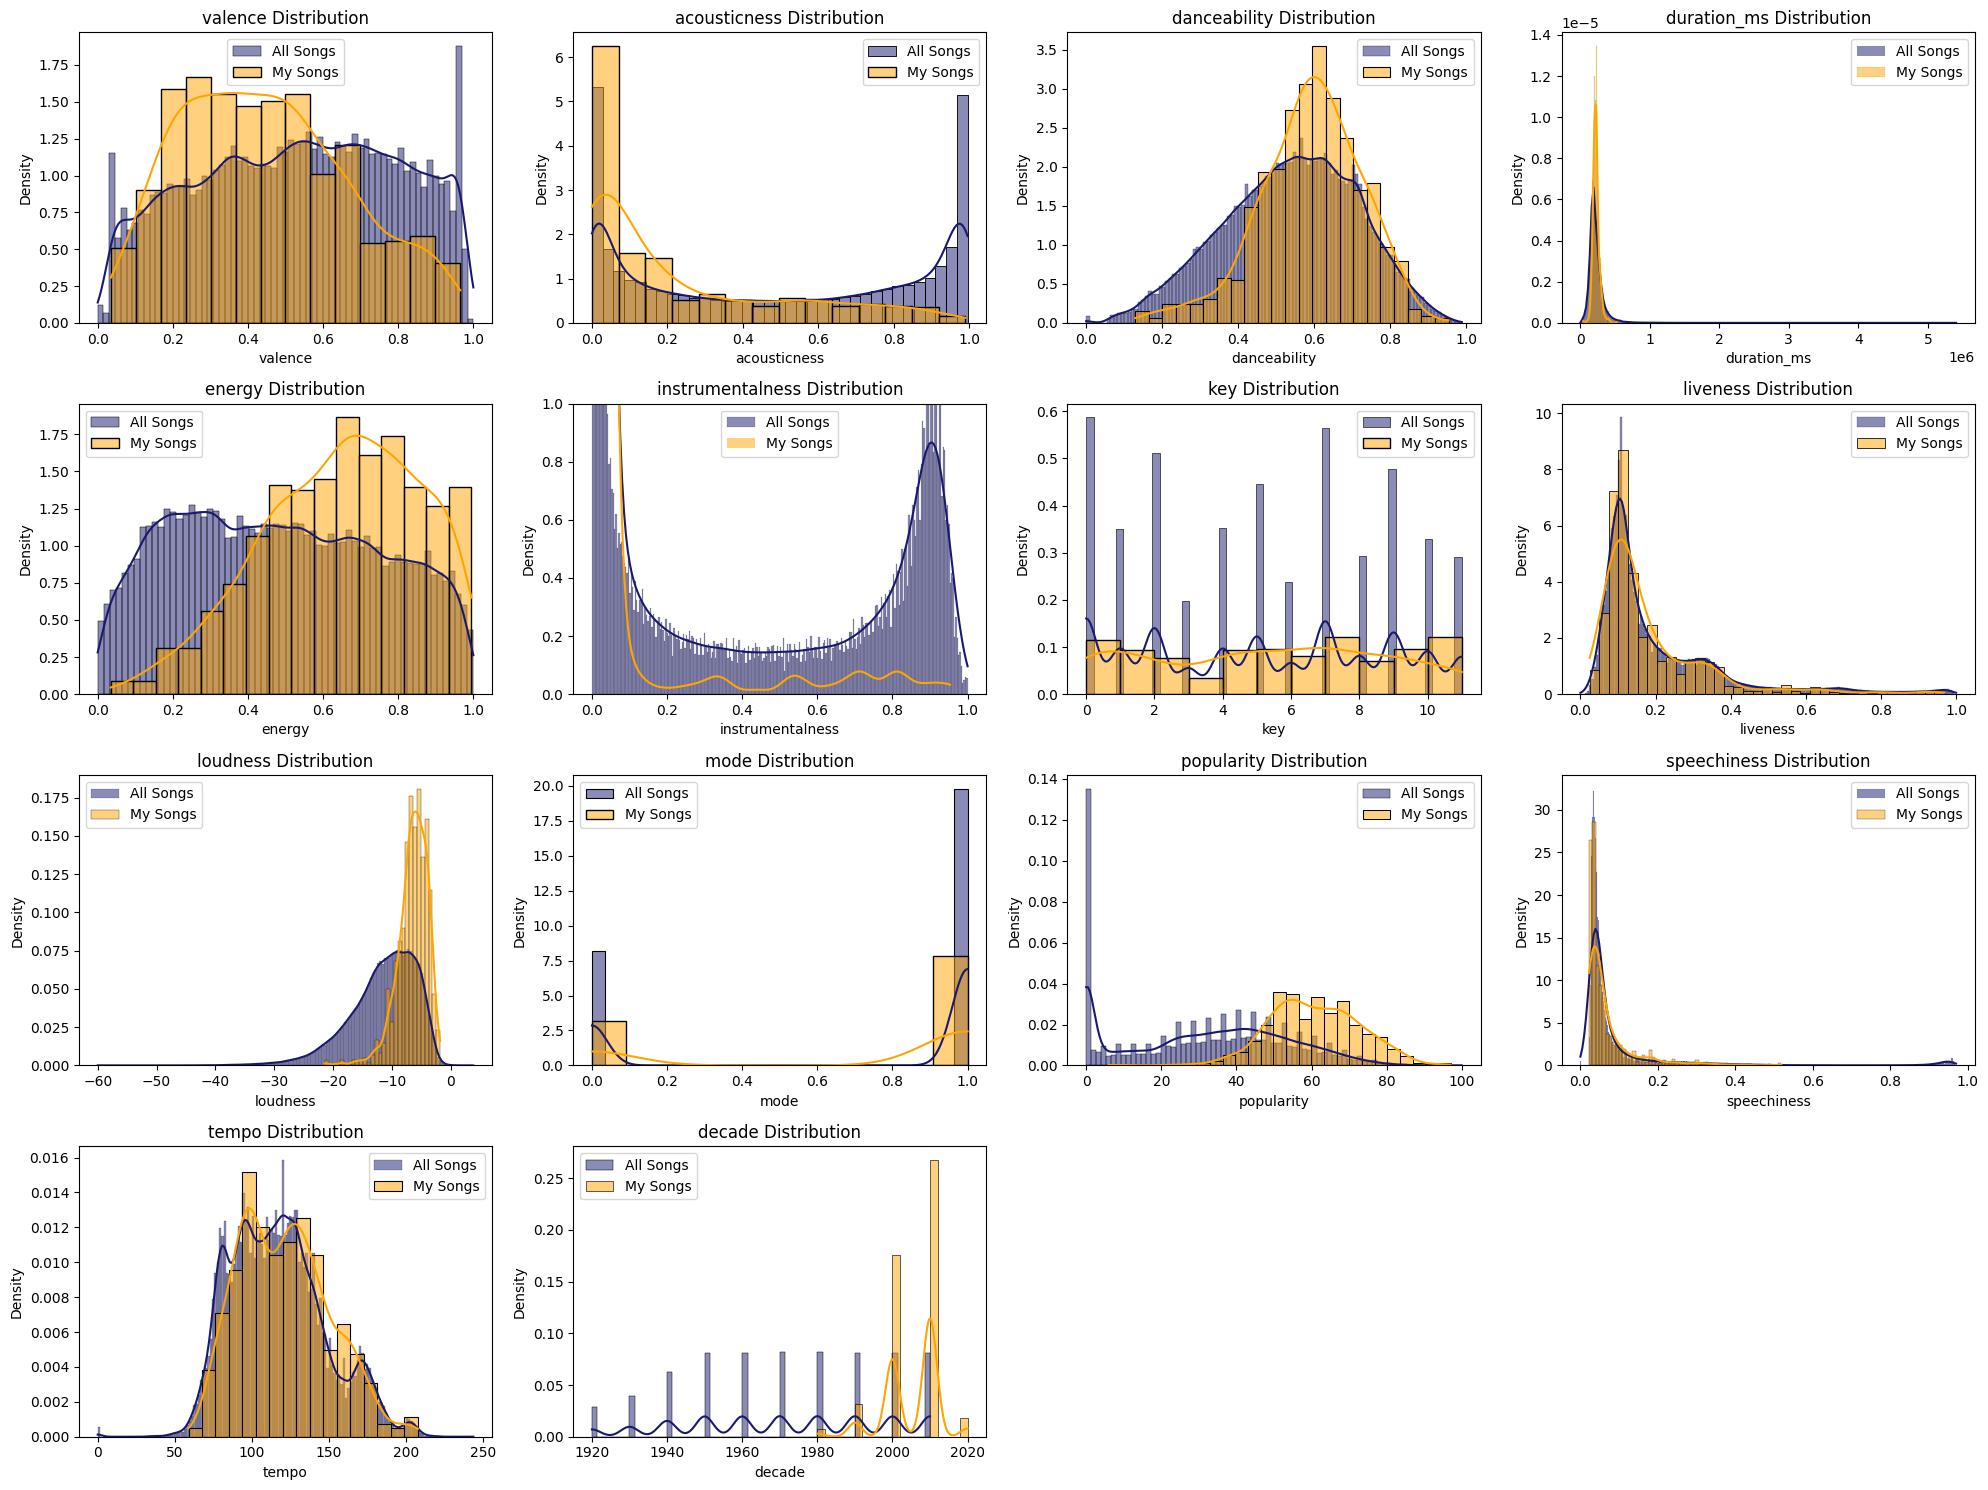

In [22]:
# Set up figure size
plt.figure(figsize=(20, 15))

# get names of the features from the DataFrame
features = all_songs_features.columns.tolist()

for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)

    # Plot the distribution of all songs, normalized
    sns.histplot(data=all_songs_features, x=feature, kde=True, color='midnightblue', label='All Songs',
                 alpha=0.5, stat="density")

    # Plot the distribution of your songs, normalized
    sns.histplot(data=my_songs_features, x=feature, kde=True, color='orange', label='My Songs',
                 alpha=0.5, stat="density")

    plt.title(f'{feature} Distribution')
    plt.legend()

    # If the feature is 'instrumentalness', adjust the y-axis range
    if feature == 'instrumentalness':
        plt.ylim(0, 1)  # Change this as necessary

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

#reference: chat-gpt

**Conclusion**

My perference are mainly 3 parts **compared to the distrubition of all songs**.


1.   Left - skewed distribution: valence, acousticness, instrumentalness

2.   Right - skewed distribution: danceability, energy, tempo, loudness, popularity,decade

3.   Same as the distrubition of all songs: speechiness, liveness, duration_ms



Summary

*   lower or more "sad" emotional;non-acoustic; vocal parts;
*   strong rhythm;  higher energy; louder; mainstream songs; recent songs.

*   My perference in these five features :'valence', 'acousticness', 'energy','loudness', 'danceability' is the most special.

### 2.5 Classicfication and Labelling

Because there are 14 features and the number of all songs is huge, so I deciede to use PCA to reduce Dimensions.

(Acutally, it's because the cell would crash if I don't reduce dimensions.)

2.5.1 Find Elbow for dimension reduction


In [34]:
from sklearn.decomposition import PCA

Scale the features before PCA

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_my_songs_features = scaler.fit_transform(my_songs_features)
scaled_all_songs_features = scaler.fit_transform(all_songs_features)

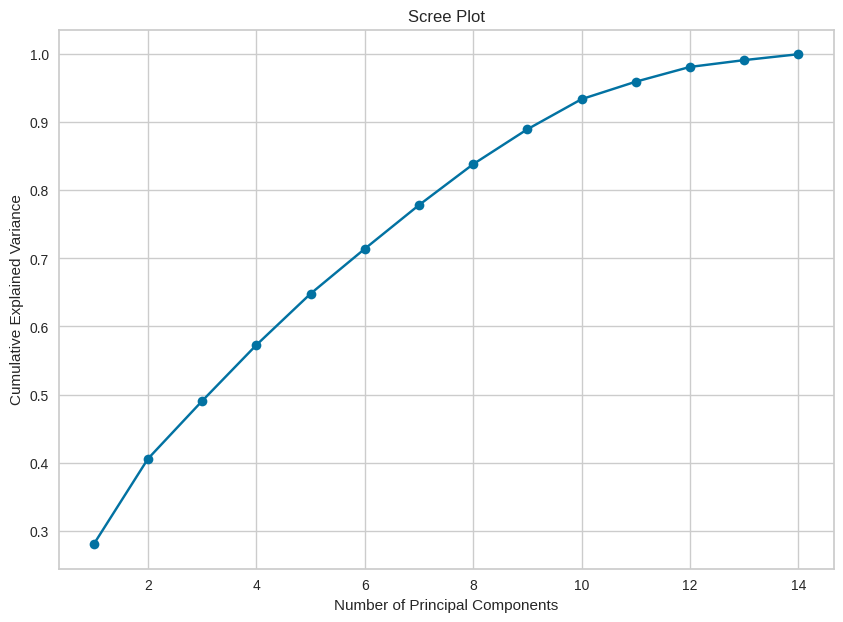

In [36]:
pca = PCA(n_components=None)
pca.fit(scaled_all_songs_features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

The slope at 2 changes rapidly, so let PCA Elbow = 2

2.5.2 Find elbow for classification

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [38]:
# my_songs and all_songs to 2 dimensions
pca = PCA(n_components=2)
my_songs_features_pca = pca.fit_transform(scaled_my_songs_features)
all_songs_features_pca = pca.fit_transform(scaled_all_songs_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

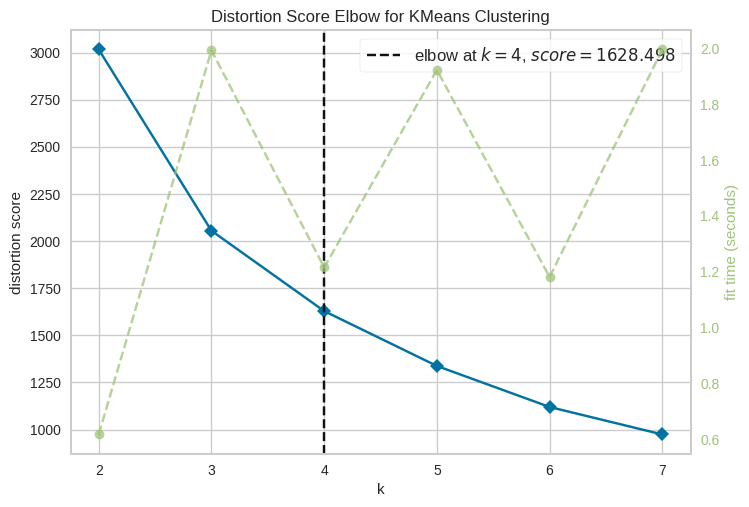

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,8))
visualizer.fit(my_songs_features_pca)
visualizer.poof()

Elbow for my_songs Kmeans clustering is 4

2.5.3 KMeans Clustering

In [40]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(my_songs_features_pca)
my_songs_labels = k_fit.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_my_songs_pca = pd.DataFrame(data=my_songs_features_pca, columns=['PCA1', 'PCA2'])
df_my_songs_pca['Clusters'] = my_songs_labels
df_my_songs_pca

,PCA1,PCA2,Clusters
0,0.830017,1.031775,1
1,2.150879,-0.222202,3
2,3.095488,1.001363,3
3,2.161851,0.673937,1
4,1.903561,0.917037,1
...,...,...,...
916,-2.452133,2.546117,2
917,-1.335855,1.398825,2
918,-1.275622,2.087580,2
919,-0.801443,2.633108,2


Text(0.5, 1.0, 'My Songs Clusters')

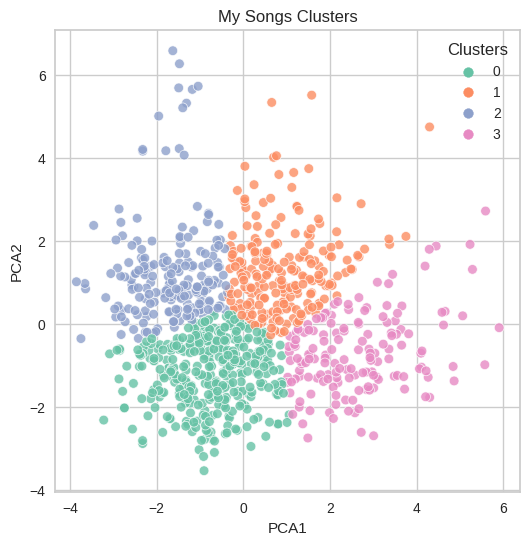

In [42]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_my_songs_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('My Songs Clusters')

In [43]:
# Kmeans fit to all_songs_pca
all_songs_labels = kmeans.predict(all_songs_features_pca)

df_all_songs_pca = pd.DataFrame(data=all_songs_features_pca, columns=['PCA1', 'PCA2'])
df_all_songs_pca['Clusters'] = all_songs_labels

Text(0.5, 1.0, 'All Songs Clusters')

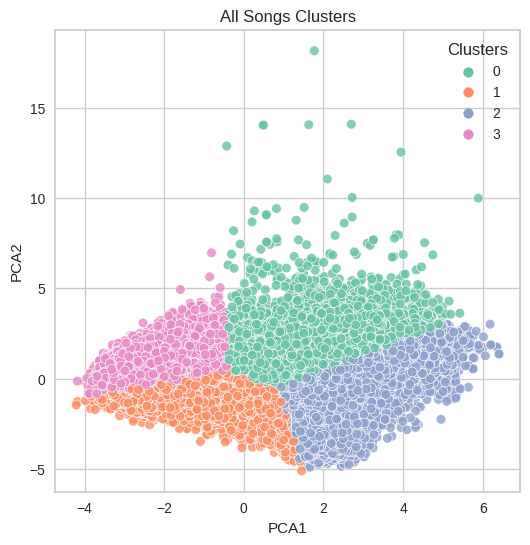

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_all_songs_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('All Songs Clusters')

### 2.6 Understand each cluster

In [44]:
# create 4 new dataframe for each cluster of my_songs keep the index of df_my_songs_pca
cluster0_df = df_my_songs_pca[df_my_songs_pca['Clusters'] == 0].copy()
cluster1_df = df_my_songs_pca[df_my_songs_pca['Clusters'] == 1].copy()
cluster2_df = df_my_songs_pca[df_my_songs_pca['Clusters'] == 2].copy()
cluster3_df = df_my_songs_pca[df_my_songs_pca['Clusters'] == 3].copy()

Here I choose 4 most unique features in my_songs, namely 'valence', 'danceability','energy','loudness', to see the distribution.

This 4 features may not be able to represent the whole cluters, but they can give me a clue about the 4 clusters' characteristics and then help me to give my personal definition for them.

In [45]:
cluster0_df = cluster0_df.merge(my_songs[['name', 'artists','valence', 'danceability','energy','loudness']], left_index=True, right_index=True)
cluster1_df = cluster1_df.merge(my_songs[['name', 'artists','valence', 'danceability','energy','loudness']], left_index=True, right_index=True)
cluster2_df = cluster2_df.merge(my_songs[['name', 'artists','valence', 'danceability','energy','loudness']], left_index=True, right_index=True)
cluster3_df = cluster3_df.merge(my_songs[['name', 'artists','valence', 'danceability','energy','loudness']], left_index=True, right_index=True)

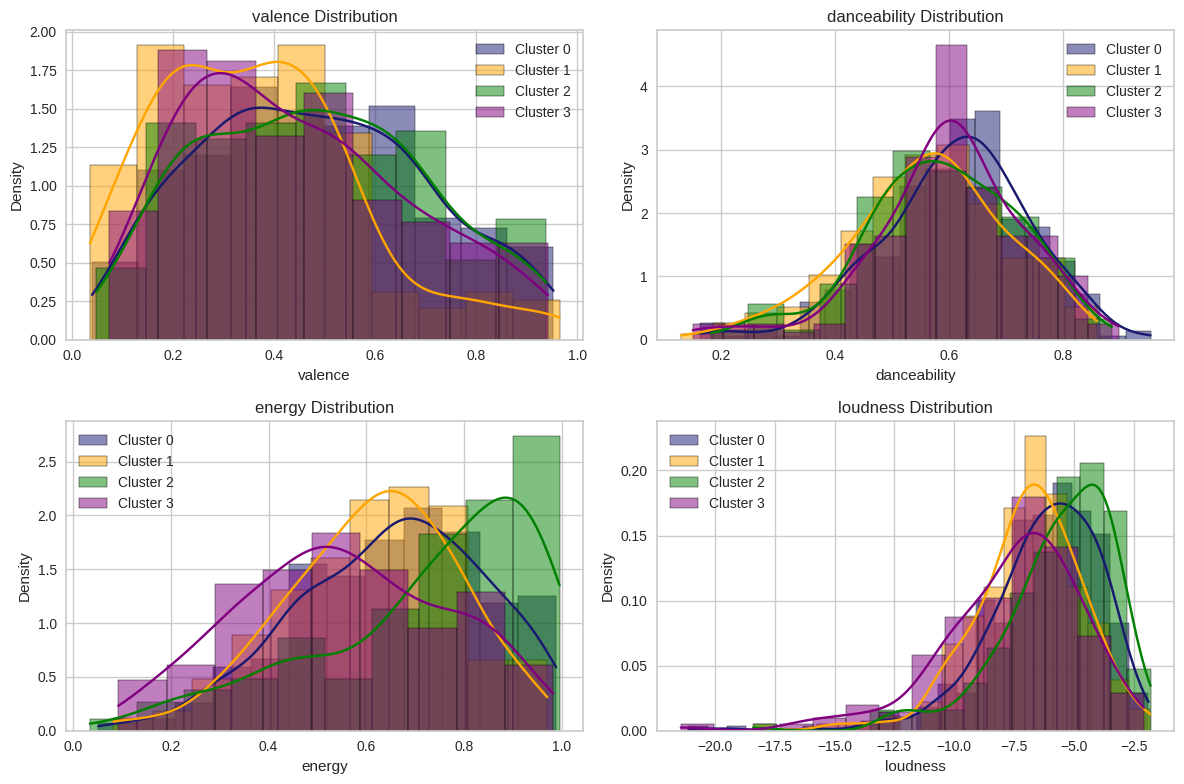

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['valence', 'danceability', 'energy','loudness']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)

    sns.histplot(data=cluster0_df, x=feature, kde=True, color='midnightblue', label='Cluster 0',
                 alpha=0.5, stat="density")
    sns.histplot(data=cluster1_df, x=feature, kde=True, color='orange', label='Cluster 1',
                 alpha=0.5, stat="density")
    sns.histplot(data=cluster2_df, x=feature, kde=True, color='green', label='Cluster 2',
                 alpha=0.5, stat="density")
    sns.histplot(data=cluster3_df, x=feature, kde=True, color='purple', label='Cluster 3',
                 alpha=0.5, stat="density")


    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


Cluster 0: low valence, high energy,high danceability, high loudness -- 'Dynamic Rhythms'

Cluster 1: low valence, medium energy,low danceability, low loudness -- 'Calm and Quiet'

Cluster 2: high valence, high energy, low danceability, high loudness -- 'Energetic Joy'

Cluster 3: low valence , low energy,medium danceability, low loudness -- 'Chill and Mellow'


## 3 Recommendation system

I will use 4 methods to create recommendation system in 4 cluster.

Cluster 0 : use euclidean_distances to calculate similarity, use the center of cluster 0 of *all songs*

Cluster 1 : use euclidean_distances to calculate similarity, use the center of cluster 1 of *my songs*

Cluster 2 : use cosine similarity to calculate similarity, input one song and get top n recommended songs

Cluster 3 : use cosine similarity to calculate similarity within my_cluster3


### 3.1 Cluster 0 --  'Dynamic Rhythms'

For Cluster 0, I use the center of all songs in cluster to calculate the distance, then recommend songs based on the distance.

In [47]:
df_cluster_0 = df_all_songs_pca[df_all_songs_pca['Clusters'] == 0]

In [48]:
cluster_0_center = df_cluster_0[['PCA1', 'PCA2']].mean(axis=0)

Because I don't know what distance is 'close', so I plot the distrubition of all the songs to the center.

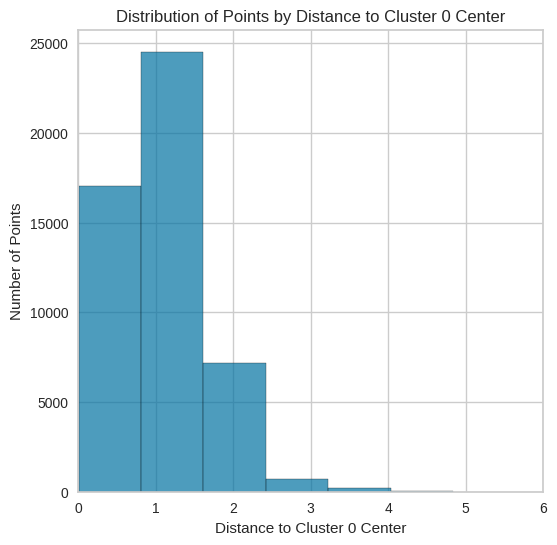

In [49]:
import seaborn as sns
from sklearn.metrics import euclidean_distances

# distance to  cluster 0 center
cluster_0_coordinates = df_cluster_0[['PCA1', 'PCA2']].values
distances_cluster_0 = euclidean_distances(cluster_0_coordinates, [cluster_0_center])

# plot
plt.figure(figsize=(6, 6))
plt.hist(distances_cluster_0, bins=6, edgecolor='black', alpha=0.7)
plt.xlabel('Distance to Cluster 0 Center')
plt.ylabel('Number of Points')
plt.title('Distribution of Points by Distance to Cluster 0 Center')
plt.xlim(0, 6)  # limted to 10
plt.show()

I want the recommendation not only cater for my taste, but also boraden my horizon of songs, so I want set the 'radius' for the distance.

For group_1_indices, recommend 5 songs; group_2_indices, recommend 3 songs; group_3_indices, recommend 2 songs.

Within one group, the recommended songs is selected randomly.

In [50]:

# Group data points into three categories with different distances
group_1_indices = np.where(distances_cluster_0 <= 0.8)[0]
group_2_indices = np.where((distances_cluster_0 > 0.8) & (distances_cluster_0 <= 1.7))[0]
group_3_indices = np.where((distances_cluster_0 > 1.7) & (distances_cluster_0 <= 2.4))[0]


In [51]:
recommendations_count = [5, 3, 2]

In [52]:
import random

recommendations = []

# For each group and the corresponding number of recommendations
for group_indices, count in zip([group_1_indices, group_2_indices, group_3_indices], recommendations_count):
    # If the number of data points in the group is less than the recommended number, the index of the entire group is added to the recommended list
    if len(group_indices) <= count:
        recommendations.extend(group_indices)
    else:
        # Otherwise, select the recommended number of indexes at random
        random_indices = random.sample(group_indices.tolist(), count)
        recommendations.extend(random_indices)

# use index to get the song and artist
print("Recommended songs:")
for song in recommendations:
    row = data.iloc[song]
    song_name = row['name']
    song_artist = row['artists']
    print(f"Song: {song_name} - Artist: {song_artist}")

Recommended songs:
Song: That's Me Without You - Artist: Al Bowlly
Song: You're Going To Lose That Girl - Remastered 2009 - Artist: The Beatles
Song: Please Let Me Wonder - Remastered - Artist: The Beach Boys
Song: Just A Gigolo - Remastered - Artist: Louis Prima
Song: Lifeline - Artist: Roy Ayers Ubiquity
Song: 54-46 Was My Number - Artist: Toots & The Maytals
Song: Sangue e Areia - Artist: Vicente Celestino
Song: Do You Know the Way to San Jose - Artist: Dionne Warwick
Song: Who Will Save Your Soul - Artist: Jewel
Song: The Modern Age - Artist: The Strokes


**Listening Experience**



*   The songs are all 'energetic'
*   The songs are almost all new songs for me, it seems this method do give me something new.
*   Not every song fits my taste, but usually there are 5-7 in 10 songs that I like.
*   My preference for recommended songs does decrease with distance.



### 3.2 Cluster 1 -- 'Calm and Quiet'

Use the center of my_cluster1 to calculate distance

In [53]:
my_df_cluster_1 = df_my_songs_pca[df_my_songs_pca['Clusters'] == 1]
my_cluster_1_center = my_df_cluster_1[['PCA1', 'PCA2']].mean(axis=0)

In [54]:
df_cluster_1 = df_all_songs_pca[df_all_songs_pca['Clusters'] == 1]

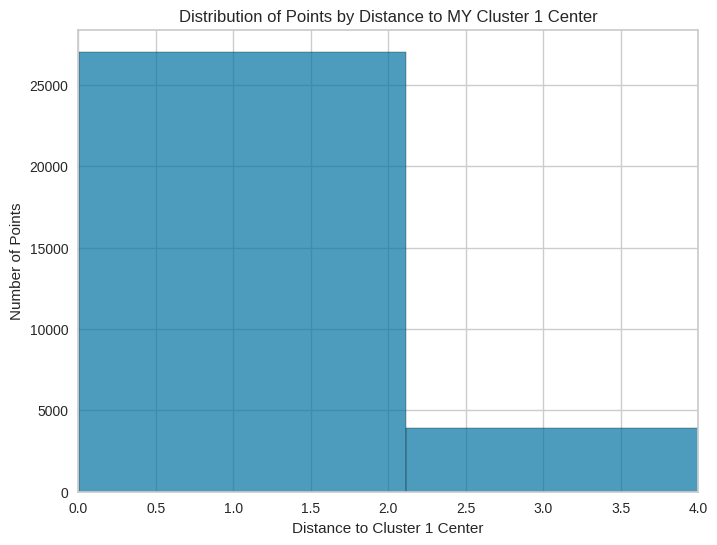

In [55]:
# distance to  cluster 0 center
cluster_1_coordinates = df_cluster_1[['PCA1', 'PCA2']].values
distances_cluster_1 = euclidean_distances(cluster_1_coordinates, [my_cluster_1_center])

# plot
plt.figure(figsize=(8, 6))
plt.hist(distances_cluster_1, bins=8, edgecolor='black', alpha=0.7)
plt.xlabel('Distance to Cluster 1 Center')
plt.ylabel('Number of Points')
plt.title('Distribution of Points by Distance to MY Cluster 1 Center')
plt.xlim(0, 4)  # limted to 10
plt.show()

This is quite interesing that, the songs are mainly crowed around the center of 'my cluster 1'.

In [56]:
group_11_indices = np.where(distances_cluster_1 <= 0.5)[0]
group_12_indices = np.where((distances_cluster_1 > 0.5) & (distances_cluster_1 <= 1))[0]
group_13_indices = np.where((distances_cluster_1 > 1) & (distances_cluster_1 <= 1.5))[0]

Here I change the recommendations_count, increase the number of songs that are closer.

In [57]:
recommendations_count = [7, 2, 1]

In [58]:
recommendations_1 = []

# For each group and the corresponding number of recommendations
for group_indices, count in zip([group_11_indices, group_12_indices, group_13_indices], recommendations_count):
    # If the number of data points in the group is less than the recommended number, the index of the entire group is added to the recommended list
    if len(group_indices) <= count:
        recommendations_1.extend(group_indices)
    else:
        # Otherwise, select the recommended number of indexes at random
        random_indices = random.sample(group_indices.tolist(), count)
        recommendations_1.extend(random_indices)

# use index to get the song and artist
print("Recommended songs:")
for song in recommendations_1:
    row = data.iloc[song]
    song_name = row['name']
    song_artist = row['artists']
    print(f"Song: {song_name} - Artist: {song_artist}")

Recommended songs:
Song: Ankhite Bhoriya Jal - Artist: Sati Devi
Song: El Mal Que Me Hiciste - Remasterizado - Artist: Francisco Canaro, Agustín Irusta, Roberto Fugazot
Song: Court and Spark - Artist: Joni Mitchell
Song: What Are You Doing The Rest Of Your Life? - Artist: Bill Evans
Song: Candy - Artist: Robbie Williams
Song: I Believe In You - Artist: Frank Sinatra, Count Basie
Song: The Elements (Music By Sir Arthur Sullivan) - Artist: Tom Lehrer
Song: Часть 39.3 & Часть 40.1 - Обратный путь - Artist: Эрих Мария Ремарк
Song: Early In The Morning - Artist: The Gap Band
Song: Shine - Artist: with Studio Orchestra


**Listening Experience**



*   Light and bright music, fit the definition of 'calm and quiet'
*   I would use listen to these songs when I do 'simple repetitive work', like replying messages or emails, cleaning my room.
*   These songs is not as attractive as those in Cluster 0, but these songs can create a peaceful mind and help me relax.

*   Not much difference from the method of clustr 0, which use the center of all songs in cluster 0.


### 3.3 Cluster 2 -- 'Energetic Joy'

Because the number of cluster2 in all songs is quite large, for Cluster2, I decide to just calculate the similarity within the cluster 2 of my_songs.

reference:Spotify analysis 3.1

In [115]:
my_cluster2_df = cluster2_df.merge(my_songs[['name','artists']], left_index=True, right_index=True)

In [116]:
my_cluster2_df = my_cluster2_df.drop(columns=['name_y', 'artists_y'])
my_cluster2_df = my_cluster2_df.rename(columns={"name_x": "name", "artists_x": "artists"})
my_cluster2_df

,PCA1,PCA2,Clusters,name,artists,valence,danceability,energy,loudness
41,-1.592710,-0.085261,2,The Day we Fall In Love,Park Shin Hye,0.442,0.721,0.876,-3.061
45,-2.232540,0.174992,2,Lies,BIGBANG,0.665,0.781,0.849,-5.644
54,-2.424331,-0.353703,2,極楽浄土,GARNiDELiA,0.706,0.623,0.973,-4.307
59,-2.528664,0.893012,2,SOBER - KR Ver.,BIGBANG,0.532,0.655,0.828,-3.363
62,-2.057898,0.522375,2,파라다이스 (꽃보다 남자OST 메인 테마),T-Max,0.650,0.616,0.941,-1.818
...,...,...,...,...,...,...,...,...,...
915,-1.612409,0.051415,2,Figure.09,Linkin Park,0.537,0.518,0.951,-3.198
916,-2.452133,2.546117,2,Lying from You - Live LP Underground Tour 2003,Linkin Park,0.650,0.396,0.974,-3.708
917,-1.335855,1.398825,2,Easier to Run,Linkin Park,0.279,0.545,0.861,-4.819
918,-1.275622,2.087580,2,Nobody's Listening,Linkin Park,0.451,0.502,0.831,-3.723


In [91]:
unique_artists = my_cluster2_df['artists'].unique()
print(unique_artists)

['Park Shin Hye' 'BIGBANG' 'GARNiDELiA' 'T-Max' 'Oddity' 'Charlie Puth'
 'Little Mix, Charlie Puth' 'Exodus' 'EXO' 'EXO-K' 'Dua Lipa, BLACKPINK'
 'Coldplay' 'Coldplay, Rihanna' 'Westlife' 'Westlife, Bernard Löhr'
 'Mariah Carey, Westlife' 'Taylor Swift' 'Boys Like Girls, Taylor Swift'
 'Taylor Swift, Ed Sheeran'
 'Taylor Swift, Brendon Urie, Panic! At The Disco'
 'Taylor Swift, Bon Iver' 'ZAYN, Taylor Swift' 'B.o.B, Taylor Swift'
 'Taylor Swift, The Chicks' 'Avril Lavigne' 'Justin Bieber'
 '24kGoldn, Justin Bieber, J Balvin, iann dior'
 'Shawn Mendes, Justin Bieber' 'Justin Bieber, Mariah Carey'
 'Justin Bieber, Nicki Minaj' 'Justin Bieber, Post Malone, Clever'
 'Ed Sheeran' 'Ed Sheeran, Yebba' 'Christina Perri, Ed Sheeran'
 'Eminem, Ed Sheeran' 'Macklemore, Ryan Lewis, Ed Sheeran'
 'Ed Sheeran, Chance the Rapper, PnB Rock' 'Ed Sheeran, Stormzy'
 'Stormzy, Burna Boy, Ed Sheeran' 'TAEYANG, G-DRAGON' 'G-DRAGON'
 'Linkin Park' 'JAY-Z, Linkin Park' 'Linkin Park, Aaron Lewis'
 'Linkin Park,

In [93]:
my_cluster2_df['track'] = my_cluster2_df['artists'] + ' - ' + my_cluster2_df['name']

In [95]:
cols = ['PCA1', 'PCA2']
my_cluster2_features = my_cluster2_df.set_index('track')[cols]

In [96]:
my_cluster2_similarities = cosine_similarity(my_cluster2_features)

cluster2_similarities = pd.DataFrame(my_cluster2_similarities,
                            columns = my_cluster2_features.index,
                            index = my_cluster2_features.index)

In [102]:
# search the index contain 'Troye Sivan'
matches = my_cluster2_features.index.str.contains('BIGBANG')

# print the index
print(my_cluster2_features.index[matches])
matches = my_cluster2_features.index.str.contains('BIGBANG', case=False)

Index(['BIGBANG - Lies', 'BIGBANG - SOBER - KR Ver.', 'BIGBANG - Haru Haru',
       'BIGBANG - BANG BANG BANG', 'BIGBANG - Lies', 'BIGBANG - FXXK IT',
       'BIGBANG - Fantastic Baby', 'BIGBANG - IF YOU',
       'BIGBANG - FANTASTIC BABY - Japanese ver.'],
      dtype='object', name='track')


In [105]:
track = "BIGBANG - Haru Haru"

# the number of recommended songs
n = 10

# get the songs
recommended_songs = cluster2_similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

print(recommended_songs)

Index(['Taylor Swift - Getaway Car', 'BIGBANG - Lies',
       'BIGBANG - FANTASTIC BABY - Japanese ver.', 'BIGBANG - FXXK IT',
       'BIGBANG - Fantastic Baby', 'Taylor Swift - Eyes Open',
       'JAY-Z, Linkin Park - Dirt off Your Shoulder / Lying From You',
       'Coldplay - Clocks', 'Taylor Swift - Christmas Must Be Something More',
       'Linkin Park - Figure.09'],
      dtype='object', name='track')


In [107]:
matches = my_cluster2_features.index.str.contains('Taylor Swift')

# print the index
print(my_cluster2_features.index[matches])
matches = my_cluster2_features.index.str.contains('Taylor Swift', case=False)

Index(['Taylor Swift - Teardrops On My Guitar - Radio Single Remix',
       'Boys Like Girls, Taylor Swift - Two Is Better Than One (feat. Taylor Swift)',
       'Taylor Swift, Ed Sheeran - Everything Has Changed',
       'Taylor Swift - 22', 'Taylor Swift - You Need To Calm Down',
       'Taylor Swift, Brendon Urie, Panic! At The Disco - ME! (feat. Brendon Urie of Panic! At The Disco)',
       'Taylor Swift, Bon Iver - exile (feat. Bon Iver)',
       'Taylor Swift - the 1', 'Taylor Swift - Last Christmas',
       'Taylor Swift - New Romantics', 'Taylor Swift - Clean',
       'Taylor Swift - Blank Space', 'Taylor Swift - Style',
       'ZAYN, Taylor Swift - I Don’t Wanna Live Forever (Fifty Shades Darker)',
       'Taylor Swift - Getaway Car', 'Taylor Swift - I Did Something Bad',
       'Taylor Swift - Mary's Song (Oh My My My)',
       'Taylor Swift - Teardrops on My Guitar - Pop Version',
       'Taylor Swift - Invisible', 'Taylor Swift - The Way I Loved You',
       'Taylor Swift -

In [125]:
#choose one song for recommendation
track = "Taylor Swift - Last Christmas"

# the number of recommended songs
n = 10

# get the songs
recommended_songs = cluster2_similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

print(recommended_songs)

Index(['Boys Like Girls, Taylor Swift - Two Is Better Than One (feat. Taylor Swift)',
       'Avril Lavigne - When You're Gone',
       'Ed Sheeran, Yebba - Best Part of Me (feat. YEBBA)',
       'Eminem, Ed Sheeran - Those Kinda Nights (feat. Ed Sheeran)',
       'Taylor Swift - This Love', 'Linkin Park - Session',
       'Taylor Swift - Silent Night', 'Coldplay - A Message',
       'Linkin Park - Given Up', 'Taylor Swift - Dress'],
      dtype='object', name='track')


**Listening Experience**



*   The recommended songs are not that similar to the track, from my own perspective.
*   Maybe it's because that PCA has lost so much infromation.
*   But all the songs in my_cluster2 do fit the 'Energetic Joy', sort of songs.


### 3.4 Cluster 3 -- 'Chill and Mellow'

From the recommendation in Cluster 0,Cluster 1 and cluster2, I found that the recommended songs are most old songs,

As a gen-z, I do gain lots of surprise through the recommendation of old songs, many are really great.
But I do prefer more recent songs.

So I will limit the decade within 1900-2020 for the next clusters.(Also for the convenience of calculation)


In [117]:
df_cluster_3 = df_all_songs_pca[df_all_songs_pca['Clusters'] == 3]

In [118]:
#merge cluster 2 with data['decade']
df_cluster_3_decade = df_cluster_3.merge(data[['name','artists','decade']], left_index=True, right_index=True)

In [119]:
df_cluster_3_filtered = df_cluster_3_decade[(df_cluster_3_decade['decade'] >= 1990) & (df_cluster_3_decade['decade'] <= 2020)]

In [120]:
df_cluster_3_filtered['track'] = df_cluster_3_filtered['artists'] + ' - ' + df_cluster_3_filtered['name']

<ipython-input-120-f81a46fe5e2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3_filtered['track'] = df_cluster_3_filtered['artists'] + ' - ' + df_cluster_3_filtered['name']


In [121]:
df_cluster_3_filtered

,PCA1,PCA2,Clusters,name,artists,decade,track
14400,3.480515,1.408606,3,"Album for the Young, Op. 39: No. 3. Mamma (Maman)","Pyotr Ilyich Tchaikovsky, Carol Rosenberger",1990,"Pyotr Ilyich Tchaikovsky, Carol Rosenberger - ..."
51738,1.151455,-0.248286,3,Won't You Be My Neighbor?,Mister Rogers,1990,Mister Rogers - Won't You Be My Neighbor?
53991,3.519657,1.487130,3,"Jeux d'enfants, Op.22 WD 56: 3. La poupée","Georges Bizet, Katia Labèque, Marielle Labèque",2000,"Georges Bizet, Katia Labèque, Marielle Labèque..."
69718,3.844139,1.867140,3,"16 Waltzes, Op. 39 (Version for Piano Duet): N...","Johannes Brahms, Yaara Tal, Andreas Groethuysen",1990,"Johannes Brahms, Yaara Tal, Andreas Groethuyse..."
70010,3.771168,1.869223,3,"16 Waltzes, Op. 39: No. 15 In A Flat Major","Johannes Brahms, Idil Biret",1990,"Johannes Brahms, Idil Biret - 16 Waltzes, Op. ..."
...,...,...,...,...,...,...,...
165695,1.240698,-0.511820,3,Snowplay - Instrumental,Thomas Newman,1990,Thomas Newman - Snowplay - Instrumental
166052,4.924452,2.488694,3,Traced overhead Op. 15 (1990): Sursum,Thomas Adès,1990,Thomas Adès - Traced overhead Op. 15 (1990): S...
166138,1.240048,-0.299925,3,"Oh, Good Grief - Vocal - Album Version",Vince Guaraldi Trio,1990,"Vince Guaraldi Trio - Oh, Good Grief - Vocal -..."
166872,0.945346,-0.465243,3,Rolling Down To Old Maui,David Coffin,2000,David Coffin - Rolling Down To Old Maui


In [122]:
cols = ['PCA1', 'PCA2']
cluster3_features = df_cluster_3_filtered.set_index('track')[cols]

In [123]:
from sklearn.metrics.pairwise import cosine_similarity

cluster3_similarities = cosine_similarity(cluster3_features)

similarities = pd.DataFrame(cluster3_similarities,
                            columns = cluster3_features.index,
                            index = cluster3_features.index)

In [124]:
track = "Thomas Newman - Snowplay - Instrumental"

# the number of recommended songs
n = 10

# get the songs
recommended_songs = similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

print(recommended_songs)

Index(['David Coffin - Rolling Down To Old Maui',
       'Jerry Garcia, David Grisman - Freight Train',
       'Faith Prince - Adelaide's Lament', 'Luiz Bonfá - Pernambuco',
       'C418 - Death',
       'The Chieftains, Marianne Faithfull - I Saw Three Ships A Sailing',
       'Vince Guaraldi Trio - Oh, Good Grief - Vocal - Album Version',
       'Charlie Parker - Yardbird Suite',
       'Mister Rogers - Won't You Be My Neighbor?',
       'Panic! At The Disco - Introduction'],
      dtype='object', name='track')


**Listening Experience**



*   The recommended songs are quite same as the input song.

**PS**

To begin with, I use Cluster 2 to select the songs between 2000- 2020, but the number is too large and made the cell crashed so many times, so I change to Cluster 3 where the number of filtered songs is small.

It seems that cosine similarity is not suitable for really large dataset. I think using embedding method to calculate similarity would be better in dealing this problem.

## Summary



In this project, I have undertaken the significant task of creating a personalized music recommendation system using the Spotify dataset.

To build a recommendation system tuned to my personal music preference, I selected 14 distinct features to create a dataset, "my_songs", which includes songs I enjoy.

To manage the high dimensionality of the dataset, I employed **PCA** (Principal Component Analysis) for dimensionality reduction, choosing 2 as the optimal number of components. **Clustering** was performed on the processed dataset, and the clustering results were extended to the entirety of the songs.

Four clusters were identified, each representing a different characteristic of music:

**Cluster 0**: "Dynamic Rhythms" - Representing songs with low valence, high energy, high danceability, and high loudness.


**Cluster 1**: "Calm and Quiet" - Representing songs with low valence, medium energy, low danceability, and low loudness.


**Cluster 2**: "Energetic Joy" - Representing songs with high valence, high energy, low danceability, and high loudness.


**Cluster 3**: "Chill and Mellow" - Representing songs with low valence, low energy, medium danceability, and low loudness.

Recommendation systems were built within each cluster using either Euclidean distances or cosine similarity measures. The goal was to recommend songs that not only **cater to my taste** but also **discover new music**.


But for Cluster2 and Cluster3, it's more like an exploration, because the calculation of cosine similarity is limited.